# Build the best accurate model to predict Credit Balance

## Read the data file and load into a data frame

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("Credit.csv")

In [5]:
data.head(5)

Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331

In [6]:
data.tail(5)

Unnamed: 0  Income  Limit  Rating  Cards  Age  Education  Gender Student  \
395         396  12.096   4100     307      3   32         13    Male      No   
396         397  13.364   3838     296      5   65         17    Male      No   
397         398  57.872   4171     321      5   67         12  Female      No   
398         399  37.728   2525     192      1   44         13    Male      No   
399         400  18.701   5524     415      5   64          7  Female      No   

    Married         Ethnicity  Balance  
395     Yes         Caucasian      560  
396      No  African American      480  
397     Yes         Caucasian      138  
398     Yes         Caucasian        0  
399      No             Asian      966

In [7]:
data.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

## Data Cleaning

### Remove missing values if any

In [16]:
data.isna().apply(pd.value_counts)

Unnamed: 0  Income  Limit  Rating  Cards  Age  Education  Gender  \
False         400     400    400     400    400  400        400     400   

       Student  Married  Ethnicity  Balance  
False      400      400        400      400

- There are no null values in dataset

### Drop Unnamed column

In [17]:
data = data.drop('Unnamed: 0', axis=1)

In [19]:
data.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

## EDA

### Value Counts of Categorical columns

In [54]:
fig, ax = plt.subplots(2,2, figsize=(10,5))
for col, subplot in zip(['Gender', 'Student', 'Married', 'Ethnicity'],ax.flatten()):
    sns.countplot(col, data=data, ax=subplot)
plt.show()

### Histogram plots of Numerical columns

In [37]:
data.plot(kind='hist', subplots=True, layout=(3,4), figsize=(20,5))
plt.show()

### Pair Plot

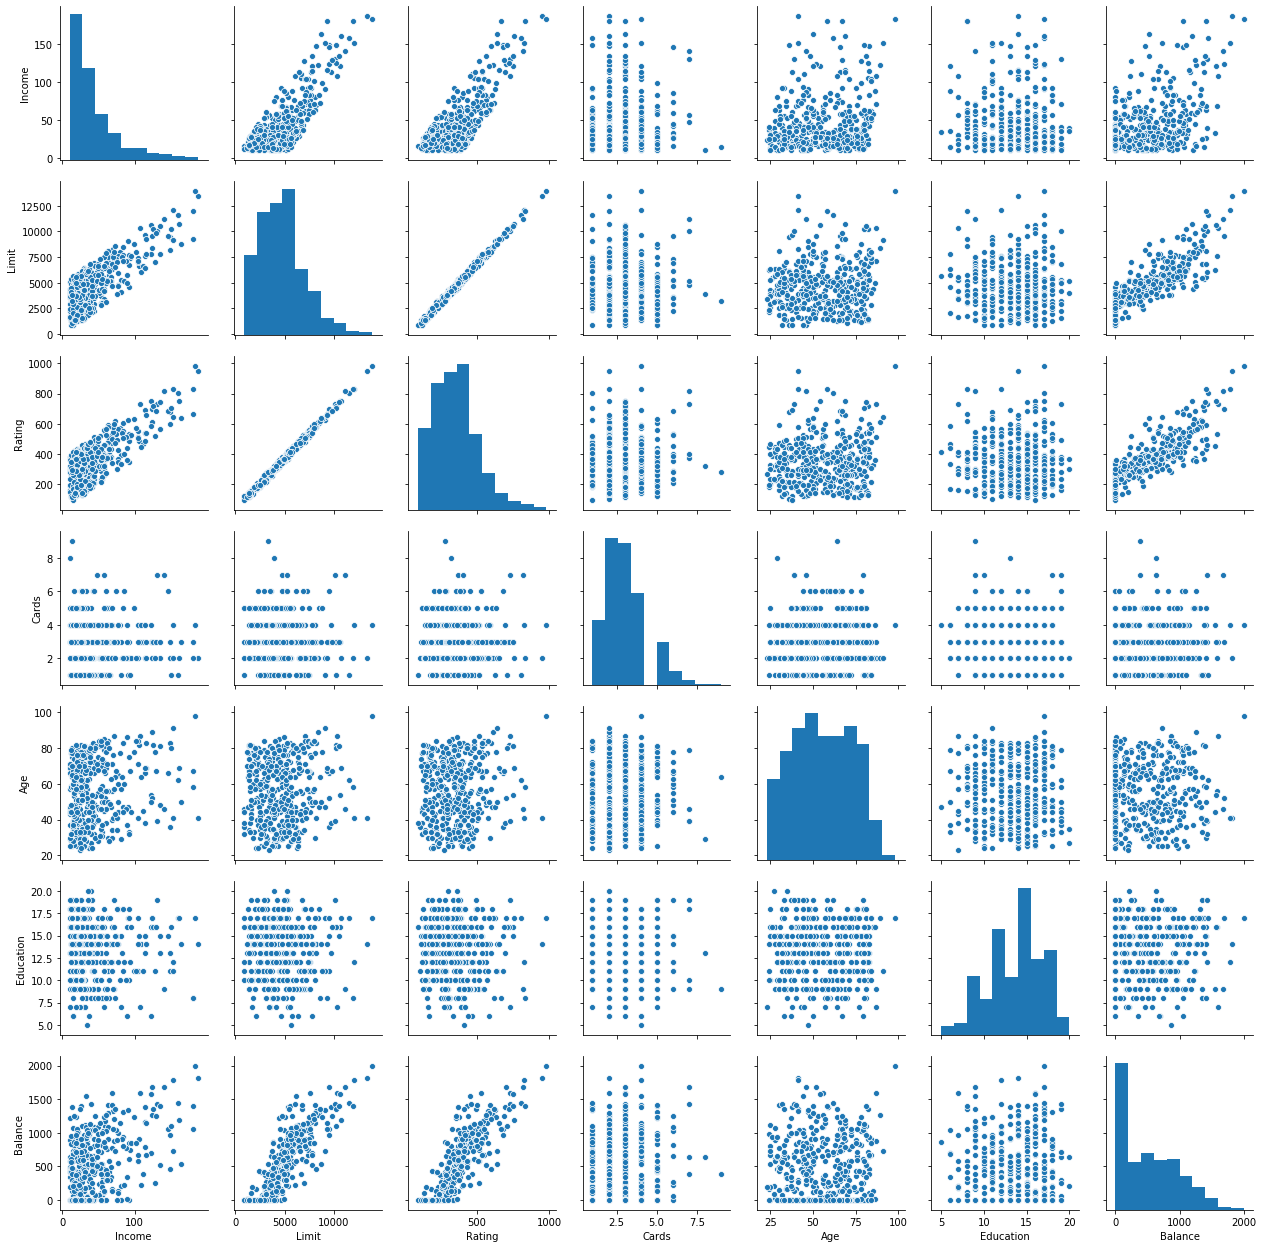

In [39]:
ax= sns.pairplot(data)

- Limit and Rating are the features having very good positive correlation
- Income has a good positive correlation with Limit and Rating, but less compared to Limit and Rating
- Balance has a slight positive correlation with Limit and Rating, but a poor correlation with Income
- The features Cards, Age and Education, do not show any good correlation with any features

### Calculate correalation table

In [48]:
data.corr()

Income     Limit    Rating     Cards       Age  \
Income               1.000000  0.792088  0.791378 -0.018273  0.175338   
Limit                0.792088  1.000000  0.996880  0.010231  0.100888   
Rating               0.791378  0.996880  1.000000  0.053239  0.103165   
Cards               -0.018273  0.010231  0.053239  1.000000  0.042948   
Age                  0.175338  0.100888  0.103165  0.042948  1.000000   
Education           -0.027692 -0.023549 -0.030136 -0.051084  0.003619   
Balance              0.463656  0.861697  0.863625  0.086456  0.001835   
Gender_Female       -0.010738  0.009397  0.008885 -0.022658  0.004015   
Student_Yes          0.019632 -0.006015 -0.002028 -0.026164 -0.029844   
Married_Yes          0.035652  0.031155  0.036751 -0.009695 -0.073136   
Ethnicity_Asian     -0.017137 -0.032427 -0.035999  0.005591 -0.059623   
Ethnicity_Caucasian -0.019701 -0.003081 -0.001070 -0.005631 -0.000822   

                     Education   Balance  Gender_Female  Student_Yes  \
Income               -0.027692  0.463656      -0.010738     0.019632   
Limit                -0.023549  0.861697       0.009397    -0.006015   
Rating               -0.030136  0.863625       0.008885    -0.002028   
Cards                -0.051084  0.086456      -0.022658    -0.026164   
Age                   0.003619  0.001835       0.004015    -0.029844   
Education             1.000000 -0.008062      -0.005049     0.072085   
Balance              -0.008062  1.000000       0.021474     0.259018   
Gender_Female        -0.005049  0.021474       1.000000     0.055034   
Student_Yes           0.072085  0.259018       0.055034     1.000000   
Married_Yes           0.048911 -0.005673       0.012452    -0.076974   
Ethnicity_Asian       0.029586 -0.009812       0.025425     0.053534   
Ethnicity_Caucasian  -0.037725 -0.003288      -0.009831    -0.048334   

                     Married_Yes  Ethnicity_Asian  Ethnicity_Caucasian  
Income                  0.035652        -0.017137            -0.019701  
Limit                   0.031155        -0.032427            -0.003081  
Rating                  0.036751        -0.035999            -0.001070  
Cards                  -0.009695         0.005591            -0.005631  
Age                    -0.073136        -0.059623            -0.000822  
Education               0.048911         0.029586            -0.037725  
Balance                -0.005673        -0.009812            -0.003288  
Gender_Female           0.012452         0.025425            -0.009831  
Student_Yes            -0.076974         0.053534            -0.048334  
Married_Yes             1.000000         0.088595             0.011418  
Ethnicity_Asian         0.088595         1.000000            -0.582131  
Ethnicity_Caucasian     0.011418        -0.582131             1.000000

### One Hot encoding categorical variables

In [56]:
data.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [57]:
data = pd.get_dummies(data, drop_first=True)

In [59]:
data.head(2)

Income  Limit  Rating  Cards  Age  Education  Balance  Gender_Female  \
0   14.891   3606     283      2   34         11      333              0   
1  106.025   6645     483      3   82         15      903              1   

   Student_Yes  Married_Yes  Ethnicity_Asian  Ethnicity_Caucasian  
0            0            1                0                    1  
1            1            1                1                    0

In [58]:
data.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Gender_Female', 'Student_Yes', 'Married_Yes', 'Ethnicity_Asian',
       'Ethnicity_Caucasian'],
      dtype='object')

### LinReg model for Female Gender

In [61]:
x = data[["Gender_Female"]]
y = data.Balance

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
print(lr.score(x,y))

0.00046113296449623586


In [65]:
print(lr.intercept_, lr.coef_)

509.8031088082901 [19.73312308]


In [66]:
predictedBalance = lr.predict(x)

In [68]:
print(predictedBalance[0:5])

[509.80310881 529.53623188 509.80310881 529.53623188 509.80310881]


In [70]:
print(x[0:5])

   Gender_Female
0              0
1              1
2              0
3              1
4              0


In [89]:
print(metrics.r2_score(y, predictedBalance), (metrics.mean_squared_error(y, predictedBalance)))

0.00046113296449623586 210752.54999098898


In [71]:
femaleBalanceSet = data.Balance[data.Gender_Female == 1]
maleBalanceSet = data.Balance[data.Gender_Female == 0]

In [73]:
print(np.mean(femaleBalanceSet), np.mean(maleBalanceSet))

529.536231884058 509.8031088082902


## Split data into train and test

In [74]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [78]:
test_size = 0.30
X = data.drop('Balance', axis=1)
y = data.Balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)

In [80]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(280, 11) (280,) (120, 11) (120,)


## Build the following Linear Regression models and analyze repective, RMSE, RMSE %, R^2 and Adjusted R^2

### Function to find Adjusted R2

In [93]:
## Adjusted R^2
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

### Function to find Model Performance of all models

In [94]:
def linRegcheckModelPerformance(X, y):
    
    #Split Data into train and test
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    #Instatiate LR model
    model = LinearRegression()
    
    # Build model with train data set
    model.fit(X_train, y_train)
    
    # Train accuracies
    trainR2 = model.score(X_train, y_train)
    predictedSales_train = model.predict(X_train)
    trainMSE = metrics.mean_squared_error(predictedSales_train, y_train)
    trainRMSE = np.sqrt(trainMSE)
    trainRMSE_pct = trainRMSE/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, X_train, y_train)
    trainAccuracies = [len(y_train), trainRMSE, trainRMSE_pct, trainR2, trainAdjR2]
    
    # Test accuracies
    testR2 = model.score(X_test, y_test)
    predictedSales_test = model.predict(X_test)
    testMSE = metrics.mean_squared_error(predictedSales_test, y_test)
    testRMSE = np.sqrt(testMSE)
    testRmse_pct = testRMSE/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, X_test, y_test)
    testAccuracies = [len(y_test), testRMSE, testRmse_pct, testR2, testAdjR2]
    
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["DataSize", "RMSE", "RMSE_Pct", "R2", "AdjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    
    return ( round(resultsDf, 4))

# M1

Balance = beta_0 + beta_1 * Income 

In [105]:
X = data[['Income']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 123)

In [106]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model.predict(X_test), y_test))
print(testRMSE)

0.19461883938597535
0.2590639222429536
412.394779840475
394.17717017614467


In [107]:
linRegcheckModelPerformance(X,y).T

DataSize      RMSE  RMSE_Pct      R2   AdjR2
trainData     280.0  412.3948   78.2135  0.1946  0.1917
testData      120.0  394.1772   78.3510  0.2591  0.2528

Analyze RMSE, RMSE%, R^2 and Adjusted R^2

# M2

Balance = beta_0 + beta_1*Limit 

In [108]:
X = data[['Limit']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size, random_state = 123)

In [109]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model2.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model2.predict(X_test), y_test))
print(testRMSE)

0.7264724669413218
0.7796886649328386
240.33274694489822
214.9411249169014


In [110]:
linRegcheckModelPerformance(X,y).T

DataSize      RMSE  RMSE_Pct      R2   AdjR2
trainData     280.0  240.3327   45.5808  0.7265  0.7255
testData      120.0  214.9411   42.7240  0.7797  0.7778

# M3

Balance = beta_0 + beta_1*Rating 

In [62]:
X = data[['Rating']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size, random_state = 7)

In [63]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
print(model3.score(X_train, y_train))
print(model3.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model3.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model3.predict(X_test), y_test))
print(testRMSE)

0.7465866447137305
0.7430437989337484
233.99492392196672
225.6670956854445


# M4

Balance = beta_0 + beta_1*Cards

In [64]:
X = data[['Cards']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size, random_state = 7)

In [65]:
model4 = LinearRegression()
model4.fit(X_train, y_train)
print(model4.score(X_train, y_train))
print(model4.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model4.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model4.predict(X_test), y_test))
print(testRMSE)

0.004651269197288754
0.00973497092195541
463.74508548823314
443.0108973947437


# M5

Balance = beta_0 + beta_1* Age

In [66]:
X = data[['Age']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size, random_state = 7)

In [67]:
model5 = LinearRegression()
model5.fit(X_train, y_train)
print(model5.score(X_train, y_train))
print(model5.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model5.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model5.predict(X_test), y_test))
print(testRMSE)

0.003431036441133184
-0.02333995048021209
464.0292590650229
450.3484296130172


# M6

Balance = beta_0 + beta_1* Education

In [68]:
X = data[['Education']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size, random_state = 7)

In [69]:
model6 = LinearRegression()
model6.fit(X_train, y_train)
print(model6.score(X_train, y_train))
print(model6.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model6.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model6.predict(X_test), y_test))
print(testRMSE)

0.00025161589200173307
-0.004317421015399336
464.76888139256124
446.14310574119276


# M7

Balance = beta_0 + beta_1*Gender

In [70]:
X = data[['Gender_Female']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size, random_state = 7)

In [71]:
model7 = LinearRegression()
model7.fit(X_train, y_train)
print(model7.score(X_train, y_train))
print(model7.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model7.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model7.predict(X_test), y_test))
print(testRMSE)

0.00010427567256232617
-0.005791179093438403
464.80312832267856
446.47032598000925


# Compare different model performances? Any observations?

# Converting many categorial features to numerical features at once

# M8

Balance = beta_0 + beta_1*Student

In [88]:
X = data[['Student_Yes']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size, random_state = 7)

In [89]:
model8 = LinearRegression()
model8.fit(X_train, y_train)
print(model8.score(X_train, y_train))
print(model8.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model8.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model8.predict(X_test), y_test))
print(testRMSE)

0.04707262654580391
0.10911395259387813
453.75517172517925
420.19392264134024


# M9

Balance = beta_0 + beta_1*Married

In [86]:
X = data[['Married_Yes']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [87]:
model9 = LinearRegression()
model9.fit(X_train, y_train)
print(model9.score(X_train, y_train))
print(model9.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model9.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model9.predict(X_test), y_test))
print(testRMSE)

1.9498825407304743e-05
-0.0038860833639360326
464.5645643858274
446.6741245472355


# M10

Balance = beta_0 + beta_1*Ethnicity_Asian

In [84]:
X = data[['Ethnicity_Asian']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [85]:
model10 = LinearRegression()
model10.fit(X_train, y_train)
print(model10.score(X_train, y_train))
print(model10.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model10.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model10.predict(X_test), y_test))
print(testRMSE)

0.00013242114806488736
-0.010081336469978552
462.7740027940604
451.323409393524


# M11

In [ ]:
Balance = beta_0 + beta_1*Ethnicity_Caucasian

In [82]:
X = data[['Ethnicity_Caucasian']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [83]:
model11 = LinearRegression()
model11.fit(X_train, y_train)
print(model11.score(X_train, y_train))
print(model11.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model11.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model11.predict(X_test), y_test))
print(testRMSE)

0.0012721968043440945
-0.02426415955370542
463.8852943531863
450.0674311744023


## Improve the accuracy by not using Rating and / or Limit

## Without Rating and Limit
## Without Rating but with Limit
## Without Limit but with Rating

# M12

In [90]:
X = data[['Limit', 'Rating']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [91]:
model12 = LinearRegression()
model12.fit(X_train, y_train)
print(model12.score(X_train, y_train))
print(model12.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model12.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model12.predict(X_test), y_test))
print(testRMSE)

0.7788505790037448
0.6264845407643624
223.03239558491387
253.28310880093966


# M13

In [92]:
X = data[['Limit', 'Cards']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [93]:
model13 = LinearRegression()
model13.fit(X_train, y_train)
print(model13.score(X_train, y_train))
print(model13.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model13.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model13.predict(X_test), y_test))
print(testRMSE)

0.7337105410850082
0.7813739319352209
237.31072206121289
213.49492292375547


# M14

In [94]:
X = data[['Limit', 'Student_Yes']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [95]:
model14 = LinearRegression()
model14.fit(X_train, y_train)
print(model14.score(X_train, y_train))
print(model14.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model14.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model14.predict(X_test), y_test))
print(testRMSE)

0.8246983833937354
0.7763872988779549
194.6408083489928
210.61054452345496


# M15

In [98]:
X = data[['Rating', 'Cards']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [99]:
model15 = LinearRegression()
model15.fit(X_train, y_train)
print(model15.score(X_train, y_train))
print(model15.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model15.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model15.predict(X_test), y_test))
print(testRMSE)

0.737751847744591
0.7514929603329361
231.62858357873273
231.00179394245086


# M16

In [100]:
X = data[['Rating', 'Student_Yes']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [101]:
model16 = LinearRegression()
model16.fit(X_train, y_train)
print(model16.score(X_train, y_train))
print(model16.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model16.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model16.predict(X_test), y_test))
print(testRMSE)

0.8307376517759584
0.7680007806252005
189.2698118945469
219.7511701681951


# M17

In [102]:
X = data[['Cards', 'Student_Yes']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [103]:
model16 = LinearRegression()
model16.fit(X_train, y_train)
print(model16.score(X_train, y_train))
print(model16.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model16.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model16.predict(X_test), y_test))
print(testRMSE)

0.09219698013190414
0.02392508262672066
439.67820075913704
446.6839848586545


# M18

In [106]:
X = data[['Income', 'Limit', 'Rating', 'Cards', 'Student_Yes']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [107]:
model18 = LinearRegression()
model18.fit(X_train, y_train)
print(model18.score(X_train, y_train))
print(model18.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model18.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model18.predict(X_test), y_test))
print(testRMSE)

0.954775968593724
0.9518518556351806
97.42757972164183
101.28979388401336


# M20

In [110]:
X = data[['Income', 'Limit', 'Cards', 'Student_Yes']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [111]:
model20 = LinearRegression()
model20.fit(X_train, y_train)
print(model20.score(X_train, y_train))
print(model20.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model20.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model20.predict(X_test), y_test))
print(testRMSE)

0.955555849811536
0.9487737046293994
96.17235501635385
105.27141506104958


# M19

In [108]:
X = data[['Income', 'Rating', 'Cards', 'Student_Yes']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [109]:
model19 = LinearRegression()
model19.fit(X_train, y_train)
print(model19.score(X_train, y_train))
print(model19.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model19.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model19.predict(X_test), y_test))
print(testRMSE)

0.9504187630796445
0.9486073810672082
99.53741830909618
110.24842757120015


# M21

In [114]:
X = data[['Income','Limit', 'Rating', 'Cards']]
y = data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  test_size)

In [115]:
model21 = LinearRegression()
model21.fit(X_train, y_train)
print(model21.score(X_train, y_train))
print(model21.score(X_test, y_test))
trainRMSE = np.sqrt(metrics.mean_squared_error(model21.predict(X_train), y_train))
print(trainRMSE)
testRMSE = np.sqrt(metrics.mean_squared_error(model21.predict(X_test), y_test))
print(testRMSE)

0.8800156811351066
0.8691855823857451
153.90824511262352
177.82606774153064


# What is the best accuracy you could get now for the above three combinations?

Balance = beta_0 + beta_1*Income + beta_2*Limit + beta_3*Rating + beta_4*Cards + beta_5*Student_Yes

In [117]:
0.95, 0.95

(0.95, 0.95)